In [25]:
# Importing dependencies
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
import seaborn as sns
sns.set_theme()
outpath = os.path.join("plots")

In [26]:

# Loading the csv-files and checking shape
data = pd.read_pickle(os.path.join('data','full_df.pkl'))
print(data.shape)
data

(8876701, 6)


,document,sub_reddit,date,type,language,confidence
0,"Ya pomniu etogo ""diktatora"" I ivo rech....day ...",ukraina,2022-03-23,submission,pl,0.106614
1,"""Why Russians should take collective responsib...",ukraina,2022-03-23,submission,en,0.915159
2,Reach out to russians and inform them about wa...,ukraina,2022-03-23,submission,en,0.916073
3,"March 23, 2022: UA Air Force destroyed 7 Russi...",ukraina,2022-03-23,submission,en,0.810842
4,Zelenskyy addresses in English: “I ask you to ...,ukraina,2022-03-23,submission,en,0.964464
...,...,...,...,...,...,...
9547552,Yes but havent gained as much as in the first ...,ukraine,2022-03-06,comment,en,0.999261
9547553,I saw on the news that it was some type of Wom...,ukraine,2022-03-06,comment,en,0.989575
9547554,it is like saying that Ukraine invaded Russia,ukraine,2022-03-06,comment,en,0.956691
9547555,"If only the oligarchs supporting, funding and ...",ukraine,2022-03-06,comment,en,0.988348


### Summary statistics

In [27]:
# summary stats for document length (number of words)
temp = data.copy()
#temp = data[data['document'].apply(lambda x: x.dtype(str))] # ensuring all documents are str
temp["doc_length"] = temp["document"].apply(lambda x: len(x.split()))
temp["doc_length"].describe()

count    8.876701e+06
mean     2.813997e+01
std      4.350119e+01
min      0.000000e+00
25%      8.000000e+00
50%      1.600000e+01
75%      3.300000e+01
max      1.828000e+03
Name: doc_length, dtype: float64

In [28]:
# Printing the longest document
test = temp[temp.doc_length == 1.828000e+03]
for i in test.document:
    print(i)

Meduza is a Russian-language opposition paper that has been banned by Putin and added to the "foreign agent" list. Reporters literally risk their life and limb to bring unfiltered reporting from within Putin's collapsing empire.

This article is long and extremely dark. 

Part I

&gt; **“Everything here reeks of the dead” In Buryatia, soldiers who died in Ukraine are buried almost daily. Did this affect the attitude of local residents to the war?**
&gt;
&gt; Buryatia ranks second among Russian regions in terms of the number of those killed in the war in Ukraine. More - only in  Dagestan . At the same time, at the funeral, which takes place in Ulan-Ude and other settlements almost every day, words of support for Russia in the fight against the "Nazis" are heard - and gratitude to the army for the fact that the dead soldiers were "not abandoned", but taken home. The publication “People of Baikal” released a report on how dead soldiers are buried in Buryatia and what their relatives, as w

In [29]:
# Remove this when run on clear data
data = data.drop(data[data.type == 'en'].index)
data = data.drop(data[data.type == 'uk'].index)

In [30]:
# get overall number of submissions and comments
data["type"].value_counts()

comment       8554629
submission     322072
Name: type, dtype: int64

In [31]:
# get number of submissions and comments per subreddit
data.groupby("sub_reddit")["type"].value_counts()

sub_reddit             type      
CombatFootage          comment       1259196
                       submission      26273
CredibleDefense        comment        102200
                       submission       1188
RussiaUkraineWar2022   comment        290971
                       submission      16937
UkraineConflict        comment         56798
                       submission       9462
UkraineInvasionVideos  comment         96492
                       submission      10729
UkraineWarReports      comment         75356
                       submission       7242
UkraineWarVideoReport  comment       1415842
                       submission      36388
UkrainianConflict      comment       1502609
                       submission      59553
geopolitics            comment         39062
                       submission       2485
ukraina                comment        106566
                       submission      11901
ukraine                comment       3519911
                     

#### Volume

Text(0, 0.5, 'document count')

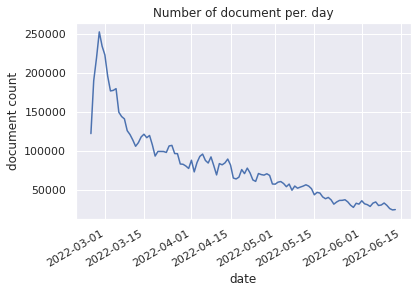

In [32]:
# plot volume per day
# convert to date
data['date'] = pd.to_datetime(data['date'])
volume = data["date"].value_counts()
volume.plot()
plt.title('Number of document per. day')
plt.xlabel('date')
plt.ylabel('document count')

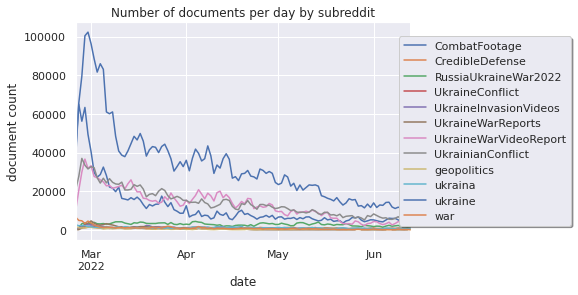

In [33]:
# plot volume per day by subreddit

vol_by_sub = data.groupby("sub_reddit")["date"].value_counts()
vol_by_sub = vol_by_sub.unstack(level=[1]).T
outfile = os.path.join(outpath, "sr_volume.png")
plt.Figure()
vol_by_sub.plot()
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5), fancybox=True, shadow=True)
plt.title('Number of documents per day by subreddit')
plt.ylabel('document count')
plt.savefig(outfile, bbox_inches = 'tight')


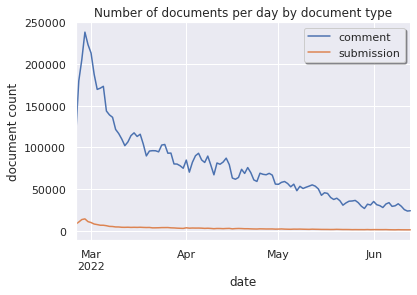

In [34]:
# plot volume per day by type
volume_t = data.groupby("type")["date"].value_counts()
volume_t = volume_t.unstack(level=[1]).T
outfile = os.path.join(outpath, "type_volume.png")
plt.Figure()
volume_t.plot()
plt.legend(loc='upper right', fancybox=True, shadow=True)
plt.title('Number of documents per day by document type')
plt.ylabel('document count')
plt.savefig(outfile, bbox_inches = 'tight')


#### Subreddits

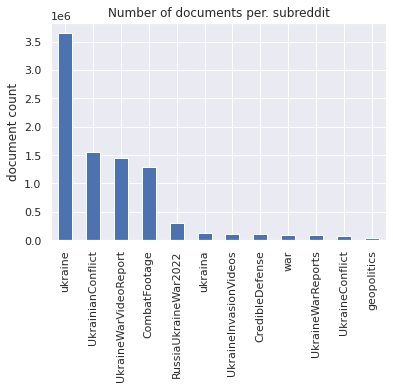

In [35]:
# plot number of entries per subreddit
outfile = os.path.join(outpath, "subreddit_count.png")
plt.Figure()
sr_plot = data["sub_reddit"].value_counts().plot.bar()
plt.ylabel('document count')
plt.title('Number of documents per. subreddit')
sr_plot.figure.savefig(outfile, bbox_inches = 'tight')

In [36]:
sr_lang = data.groupby("sub_reddit")["language"].value_counts()
sr_lang = sr_lang.unstack(level=[1])
sr_lang[['en', 'uk']]

language,en,uk
sub_reddit,,
CombatFootage,1249913.0,561.0
CredibleDefense,102846.0,8.0
RussiaUkraineWar2022,297347.0,390.0
UkraineConflict,64552.0,92.0
UkraineInvasionVideos,102715.0,156.0
UkraineWarReports,79781.0,74.0
UkraineWarVideoReport,1402983.0,1077.0
UkrainianConflict,1529187.0,897.0
geopolitics,41286.0,4.0


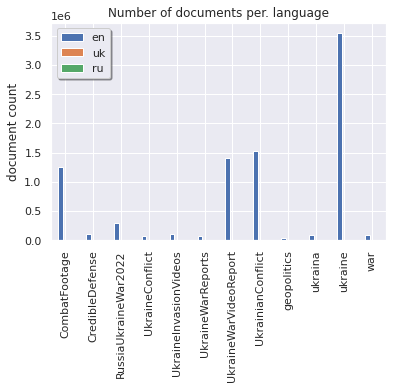

In [37]:
# plot number of posts per language by subreddit
outfile = os.path.join(outpath, "subreddit_language.png")
sr_lang = data.groupby("sub_reddit")["language"].value_counts()
sr_lang = sr_lang.unstack(level=[1])
plt.Figure()
lang_plot = sr_lang[['en', 'uk', 'ru']].plot.bar()
plt.legend(loc='upper left', fancybox=True, shadow=True)
plt.ylabel('document count')
plt.xlabel('')
plt.title('Number of documents per. language')
sr_plot.figure.savefig(outfile, bbox_inches = 'tight')


In [38]:
doc_len = temp.groupby("sub_reddit")["doc_length"].describe()
doc_len

,count,mean,std,min,25%,50%,75%,max
sub_reddit,,,,,,,,
CombatFootage,1285469.0,25.451095,36.799418,0.0,8.0,15.0,30.0,1729.0
CredibleDefense,103388.0,61.925117,93.790394,0.0,17.0,35.0,70.0,1684.0
RussiaUkraineWar2022,307908.0,28.230566,42.543857,0.0,7.0,14.0,31.0,1699.0
UkraineConflict,66260.0,28.357018,48.636589,0.0,8.0,15.0,31.0,1545.0
UkraineInvasionVideos,107221.0,21.141213,31.966507,0.0,6.0,12.0,24.0,1390.0
UkraineWarReports,82598.0,26.224170,36.698800,0.0,7.0,15.0,35.0,1339.0
UkraineWarVideoReport,1452230.0,24.902087,36.715748,0.0,7.0,15.0,30.0,1742.0
UkrainianConflict,1562162.0,30.096813,47.539733,0.0,9.0,17.0,35.0,1796.0
geopolitics,41547.0,59.878427,86.038674,0.0,15.0,34.0,69.0,1632.0


#### Language

In [39]:
# get number of entries per language
print(data["language"].value_counts())

en     8603342
it       49366
de       34334
ru       30636
uk       19319
        ...   
mzn          2
co           2
bcl          1
lrc          1
myv          1
Name: language, Length: 166, dtype: int64


In [40]:
# get table of language percentages across subreddits
en_ru_uk = sr_lang[["en","ru","uk"]]
x = data["sub_reddit"].value_counts()
df = pd.concat([en_ru_uk, x.rename("total")], axis=1)

# find percentages
en_ru_uk['en_percent'] = df['en'] / df['total'] * 100
en_ru_uk['ru_percent'] = df['ru'] / df['total'] * 100
en_ru_uk['uk_percent'] = df['uk'] / df['total'] * 100

# round decimals
en_ru_uk.round(decimals = 2)

/tmp/ipykernel_7758/2263735753.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_ru_uk['en_percent'] = df['en'] / df['total'] * 100
/tmp/ipykernel_7758/2263735753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_ru_uk['ru_percent'] = df['ru'] / df['total'] * 100
/tmp/ipykernel_7758/2263735753.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

language,en,ru,uk,en_percent,ru_percent,uk_percent
sub_reddit,,,,,,
CombatFootage,1249913.0,2301.0,561.0,97.23,0.18,0.04
CredibleDefense,102846.0,32.0,8.0,99.48,0.03,0.01
RussiaUkraineWar2022,297347.0,1348.0,390.0,96.57,0.44,0.13
UkraineConflict,64552.0,179.0,92.0,97.42,0.27,0.14
UkraineInvasionVideos,102715.0,501.0,156.0,95.80,0.47,0.15
UkraineWarReports,79781.0,274.0,74.0,96.59,0.33,0.09
UkraineWarVideoReport,1402983.0,4007.0,1077.0,96.61,0.28,0.07
UkrainianConflict,1529187.0,2504.0,897.0,97.89,0.16,0.06
geopolitics,41286.0,20.0,4.0,99.37,0.05,0.01
